In [5]:
import os
import matplotlib.pyplot as plt

current_path = os.getcwd()

In [6]:
import pandas as pd

data_200_path = os.path.join(current_path, "../data/sensor_data_200.txt")
data_200 = pd.read_csv(data_200_path, delimiter=" ", header=None, names=("date","time","ir","lidar"))

<AxesSubplot:>

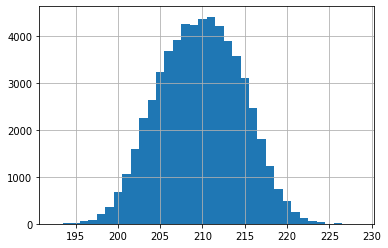

In [7]:
data_200["lidar"].hist(bins=max(data_200["lidar"])-min(data_200["lidar"]), align="left")

In [8]:
freqs = pd.DataFrame(data_200["lidar"].value_counts())
freqs["probs"]=freqs["lidar"]/len(data_200["lidar"])

In [9]:
freqs.sum()

lidar    58988.0
probs        1.0
dtype: float64

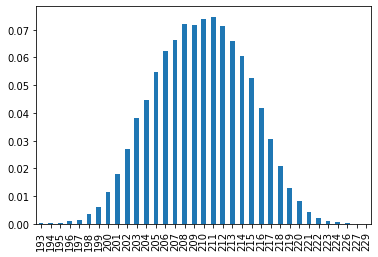

In [10]:
freqs["probs"].sort_index().plot.bar()
plt.show()

In [11]:
freqs.sample(n=2, weights="probs").index[0]

211

In [12]:
def sample_data():
    return freqs.sample(n=1, weights="probs").index[0]

samples = [sample_data() for i in range(len(data_200))]

<function matplotlib.pyplot.show(close=None, block=None)>

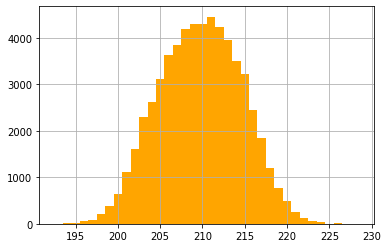

In [13]:
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
p.hist(bins=max(p)-min(p),color="orange",align="left")
plt.show

In [14]:
import numpy as np

mean1 = data_200["lidar"].mean()
stddev1 = np.sqrt(data_200["lidar"].var())

209.73713297619855 4.838192492920729


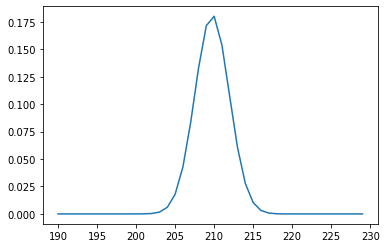

In [15]:
from scipy.stats import norm
import numpy as np

zs = range(190,230)
ys = [norm.pdf(z, mean1, np.sqrt(stddev1)) for z in zs]
print(mean1, stddev1)

plt.plot(zs, ys)
plt.show()

# 複雑な分布

In [16]:
data_600_path = os.path.join(current_path, "../data/sensor_data_600.txt")
data_600 = pd.read_csv(data_600_path, delimiter=" ", header=None, names=("date","time","ir","lidar"))

<AxesSubplot:>

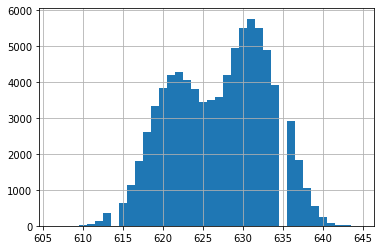

In [17]:
data_600["lidar"].hist(bins=max(data_600["lidar"])-min(data_600["lidar"]), align="left")

<AxesSubplot:>

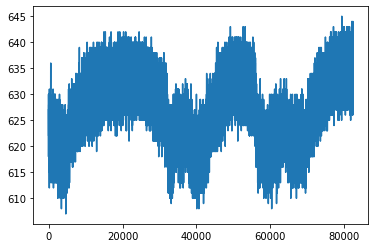

In [18]:
data_600["lidar"].plot()

In [19]:
data_600["hour"] = [e//1e4 for e in data_600["time"]]

In [20]:
d = data_600.groupby("hour")

<AxesSubplot:xlabel='hour'>

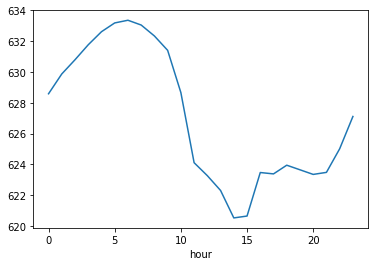

In [21]:
d.lidar.mean().plot()

<AxesSubplot:>

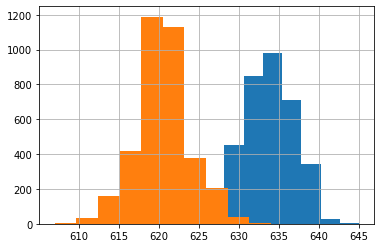

In [22]:
d.lidar.get_group(6).hist()
d.lidar.get_group(14).hist()

In [23]:
each_hour = {i:d.lidar.get_group(i).value_counts().sort_index() for i in range(24)}
freqs = pd.concat(each_hour, axis=1)
freqs = freqs.fillna(0)
probs = freqs/len(data_600)

<AxesSubplot:>

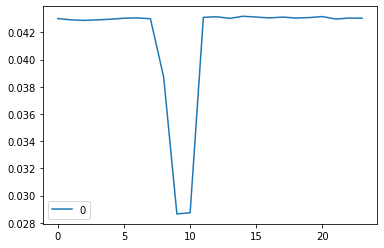

In [24]:
p_t = pd.DataFrame(probs.sum())
p_t.plot()

<AxesSubplot:>

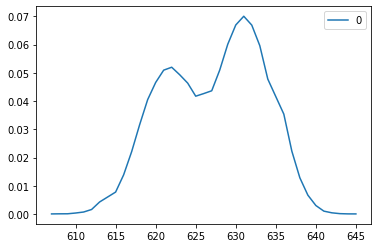

In [25]:
p_z =pd.DataFrame(probs.transpose().sum())
p_z.plot()

In [26]:
cond_z_t = probs/p_t[0]

In [27]:
cond_t_z = probs.transpose()/probs.transpose().sum()

In [28]:
def bayes_estimation(sensor_value, current_estimation):
    new_estimation = [None]*24
    for i in range(24):
        new_estimation[i] = cond_z_t[i][sensor_value]*current_estimation[i]
    print(sum(new_estimation))
    return new_estimation/sum(new_estimation)

In [29]:
bayes_estimation(630, p_t[0])

0.06694936878045224


array([0.06134301, 0.08475499, 0.08548094, 0.07368421, 0.06424682,
       0.05117967, 0.05117967, 0.05408348, 0.06479129, 0.05426497,
       0.04736842, 0.03176044, 0.02595281, 0.02323049, 0.00235935,
       0.00127042, 0.00907441, 0.01669691, 0.02504537, 0.03121597,
       0.03284936, 0.03212341, 0.03375681, 0.04228675])

In [30]:
p_z[0][630]

0.06694936878045224

# 多次元のガウス分布

/home/smallbug/anaconda3/envs/probabilistic_robotics/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


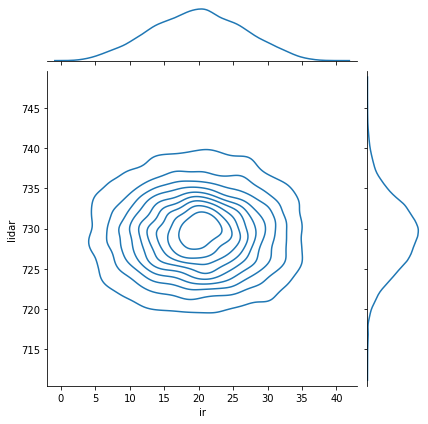

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_700_path = os.path.join(current_path, "../data/sensor_data_700.txt")
data_700 = pd.read_csv(data_700_path, delimiter=" ", header=None, names=("date","time","ir","lidar"))

d = data_700[(data_700.time < 160000) & (data_700.time >= 120000)]
d = d.loc[:, ["ir", "lidar"]]

sns.jointplot(d["ir"],d["lidar"],d,kind="kde")
plt.show()

In [44]:
diff_ir=d.ir-d.ir.mean()
diff_lidar=d.lidar-d.lidar.mean()
a = diff_ir * diff_lidar

In [51]:
from scipy.stats import multivariate_normal
irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)

<a list of 6 text.Text objects>

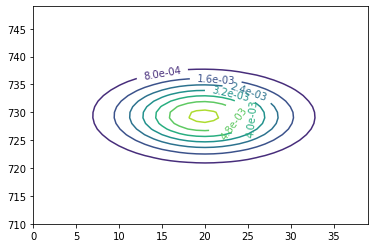

In [63]:
import numpy as np
x,y = np.mgrid[0:40,710:750]
pos = np.empty(x.shape + (2,))
pos[:,:,0]=x
pos[:,:,1]=y
cont = plt.contour(x,y,irlidar.pdf(pos))
cont.clabel(fmt="%1.1e")

In [55]:
x.shape

(40, 40)

In [56]:
y.shape

(40, 40)

In [58]:
pos.shape

(40, 40, 2)